In [3]:
#import pandas
import pandas as pd
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("diabetes.csv", header=None, names=col_names)

In [4]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [5]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [6]:
# split X and y into training and testing sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=16)

In [8]:
pima = pd.read_csv("diabetes.csv")  # Automatically reads headers


In [9]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv("diabetes.csv", header=0, names=col_names)  # skip first row's header


In [10]:
X = pima.drop("label", axis=1)
y = pima["label"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=16)


In [11]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression(random_state=16, max_iter=1000)  # increase iterations to avoid convergence warnings
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)


In [12]:
# import the metrics class
from sklearn import metrics

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[95,  7],
       [21, 31]])

NameError: name 'Text' is not defined

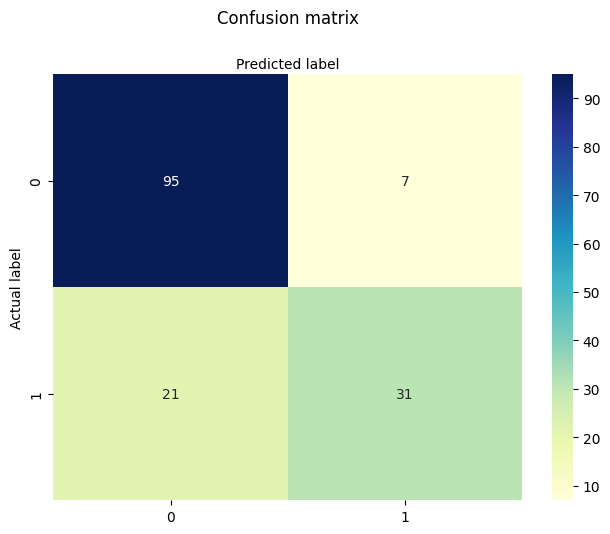

In [13]:
# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

Text(0.5,257.44,'Predicted label');

In [14]:
from sklearn.metrics import classification_report
target_names = ['without diabetes', 'with diabetes']
print(classification_report(y_test, y_pred, target_names=target_names))

                  precision    recall  f1-score   support

without diabetes       0.82      0.93      0.87       102
   with diabetes       0.82      0.60      0.69        52

        accuracy                           0.82       154
       macro avg       0.82      0.76      0.78       154
    weighted avg       0.82      0.82      0.81       154



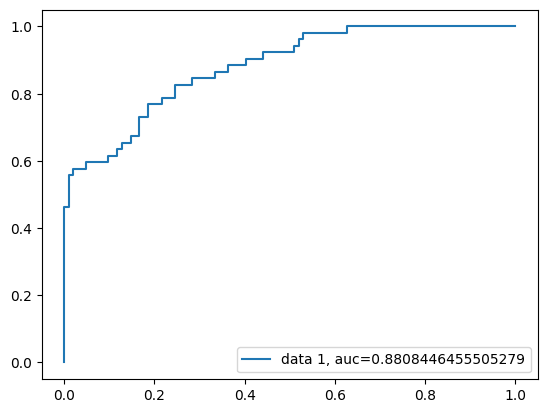

In [15]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

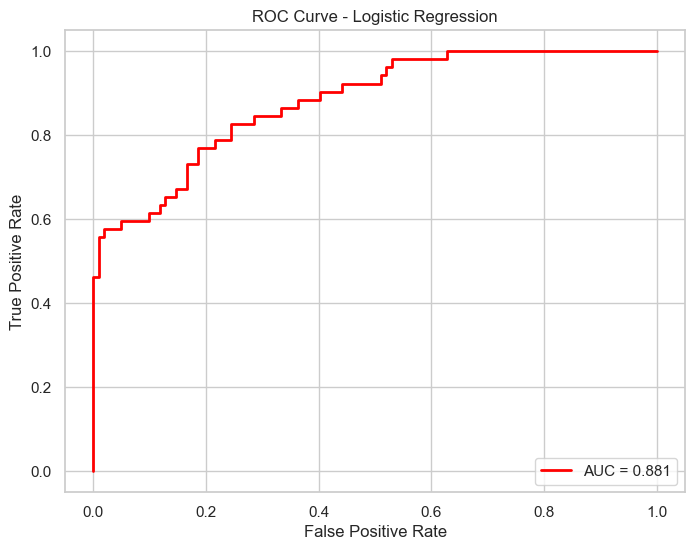

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import metrics

# Apply seaborn style
sns.set(style="whitegrid")

# Predicted probabilities
y_pred_proba = logreg.predict_proba(X_test)[:, 1]

# ROC curve
fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot with seaborn style but red line
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='red', label=f"AUC = {auc:.3f}", linewidth=2)

# Labels and legend
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend(loc=4)
plt.show()


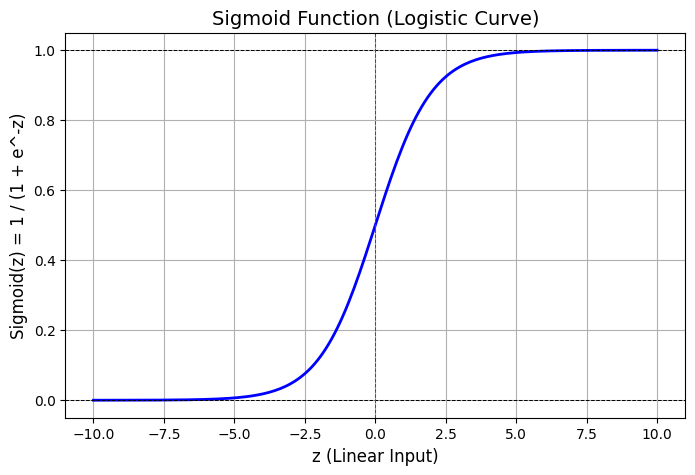

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Define sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Generate values for z (linear input)
z = np.linspace(-10, 10, 200)   # from -10 to +10
sig = sigmoid(z)

# Plot sigmoid curve
plt.figure(figsize=(8,5))
plt.plot(z, sig, color="blue", linewidth=2)

# Add horizontal & vertical reference lines
plt.axhline(0, color='black', linestyle='--', linewidth=0.7)
plt.axhline(1, color='black', linestyle='--', linewidth=0.7)
plt.axvline(0, color='red', linestyle='--', linewidth=0.7)

# Labels and title
plt.title("Sigmoid Function (Logistic Curve)", fontsize=14)
plt.xlabel("z (Linear Input)", fontsize=12)
plt.ylabel("Sigmoid(z) = 1 / (1 + e^-z)", fontsize=12)

plt.grid(True)
plt.show()
